In [10]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from utils import *

In [11]:
# Set display format for floats to regular decimal notation
pd.set_option('display.float_format', '{:.20f}'.format)

In [12]:
tickers = [
    "AAPL", "MSFT", "GOOG", "AMZN", "NVDA", "ADBE", "ORCL", "CRM", "INTC", "CSCO",  # Technology
    "JNJ", "PFE", "MRK", "UNH", "BMY", "LLY", "ABBV", "GILD", "MDT", "ELV",         # Healthcare
    "PG", "KO", "PEP", "WMT", "CL", "KMB", "MO", "MDLZ", "GIS", "COST",             # Consumer Staples
    "TSLA", "NKE", "MCD", "SBUX", "TGT", "HD", "LOW", "TJX", "ROST", "AMT",         # Consumer Discretionary
    "JPM", "BAC", "GS", "WFC", "C", "AXP", "SCHW", "MS", "BLK", "USB",              # Financials
    "BA", "CAT", "MMM", "HON", "UNP", "LMT", "GE", "RTX", "UPS", "DE",              # Industrials
    "NEE", "DUK", "SO", "AEP", "EXC", "D", "XEL", "ED", "SRE", "PPL",               # Utilities
    "VZ", "T", "CMCSA", "DIS", "NFLX", "GOOGL", "META", "CHTR", "TMUS", "SPOT",     # Communication Services
    "XOM", "CVX", "COP", "SLB", "PSX", "VLO", "MPC", "HAL", "BKR", "OXY",           # Energy
    "IEF", "TLT", "GOVT", "BND", "LQD", "HYG", "TIP", "AGG", "VCIT", "VCSH",        # Bonds
    "VNQ", "IYR", "SCHH", "RWR", "XLRE", "PLD", "O", "SPG", "AVB", "EQR",           # REITs
    "GLD", "IAU", "SLV", "PDBC", "DBC", "USO", "UNG", "BNO", "GSG", "CORN"          # Commodities
]

# Download historical data for all tickers (adjust date range as needed)
data = yf.download(tickers, start="2005-01-01", end="2024-10-01")['Adj Close']

# Display the first few rows
# print(data.head())

[*********************100%%**********************]  120 of 120 completed


## Defining the Parameters

In [13]:
daily_returns = daily_returns_calc(data)
expected_daily_metrics = expected_daily_metric_calc(daily_returns)
expected_daily_returns = expected_daily_metrics['daily_returns']
daily_covariance_matrix = expected_daily_metrics['daily_covariance']

/Users/meganng/Desktop/DSA4212/Assignment/final/utils.py:12: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  daily_returns = adj_close.ffill().pct_change().dropna()


In [14]:
annual_metrics = annual_metrics_calc(expected_daily_returns, daily_covariance_matrix)
annual_returns = annual_metrics['annual_returns']
covariance_matrix = annual_metrics['cov_matrix']  

## Plotting the Efficient Frontier

In [15]:
# Defining the range of target risks to consider
target_risks = np.linspace(0.01, 0.6, 50)

In [16]:
portfolio_risks = efficient_front_plot(annual_returns, target_risks, covariance_matrix)[0]
portfolio_returns =  efficient_front_plot(annual_returns, target_risks, covariance_matrix)[1]

Optimization problem was not solved successfully for 0.01.
Optimization problem was not solved successfully for 0.022040816326530613.
Optimization problem was not solved successfully for 0.034081632653061224.
Optimization problem was not solved successfully for 0.01.
Optimization problem was not solved successfully for 0.022040816326530613.
Optimization problem was not solved successfully for 0.034081632653061224.


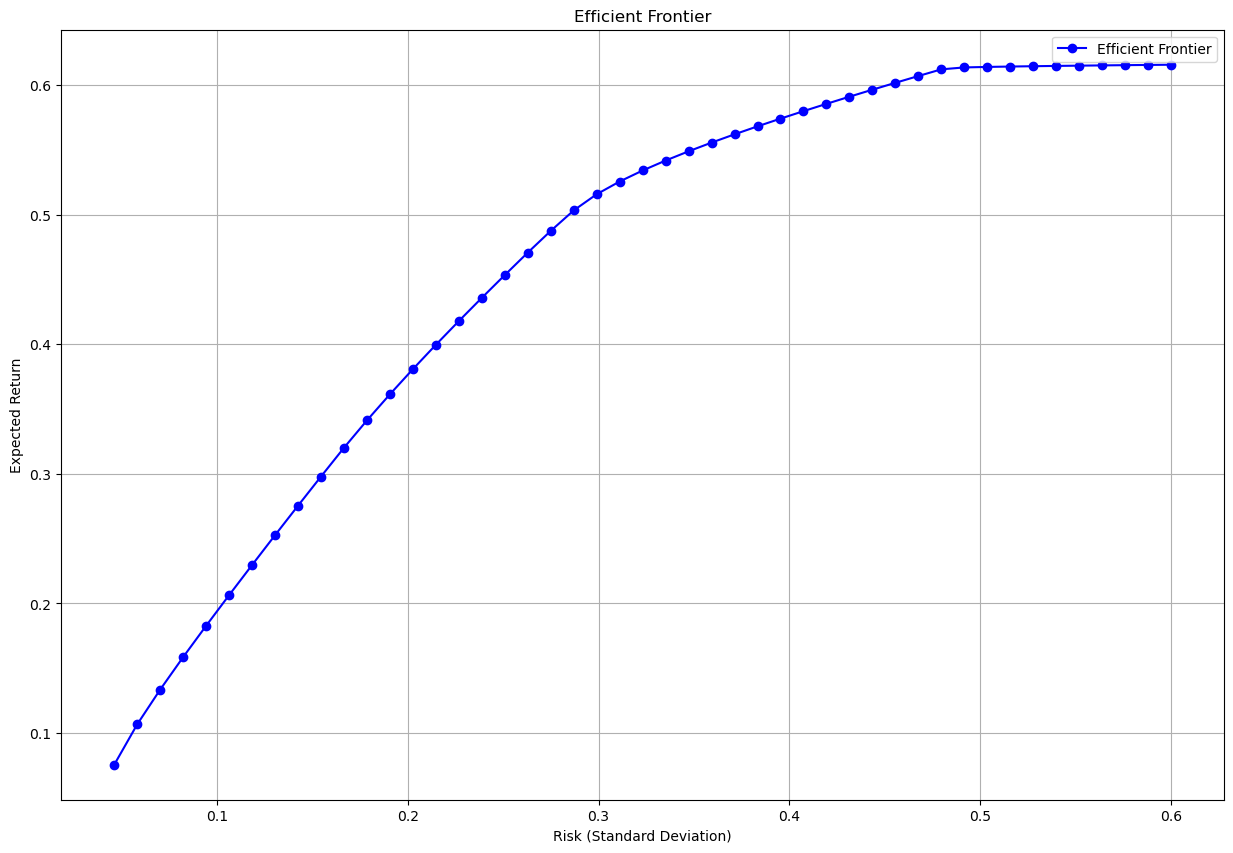

In [17]:
# Plot the Efficient Frontier
plt.figure(figsize=(15, 10))
plt.plot(portfolio_risks, portfolio_returns, 'b-o', label='Efficient Frontier') 
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.grid(True)
plt.legend()
plt.show()